In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd drive/MyDrive/창시구/package

/content/drive/MyDrive/창시구


In [55]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
%matplotlib inline


Simple Function \\
 \\
example: 

$ y = \cos(x) $

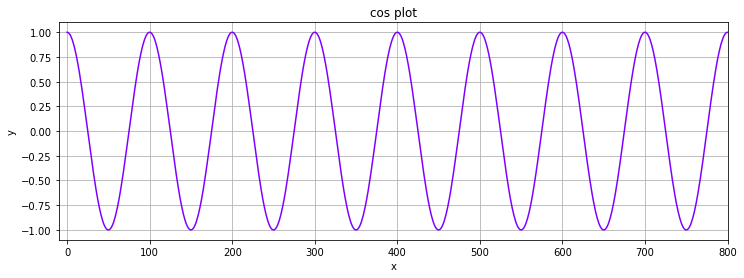

In [69]:
x = np.linspace(0,100,10000)
y = np.cos(x*2*np.pi)
plt.figure(figsize=(12,4))
plt.xlim(-10,801)
plt.grid(True)
plt.xlabel("x")
plt.ylabel("y")
plt.title("cos plot")
plt.plot(y,color='#8000ff')
plt.show()

In [80]:
train_size = 5000
test_size = 40
sol_train = y[:-test_size]
dim = 1
y = torch.tensor(sol_train).to(torch.float32)

<ipython-input-80-b4aa9b455e0b>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(sol_train).to(torch.float32)


In [81]:
train_set = y[:-test_size]
test_set = y[-test_size:]

In [82]:
window_size = 40
train_data = input_data(train_set, window_size)


In [87]:
class RNN(nn.Module):
    
  def __init__(self,input_size = dim, hidden_size = 128, num_layers = 3, out_size = dim):
    super().__init__()
    self.hidden_size = hidden_size
    self.window_size = 40
    self.num_layers = num_layers
    self.hidden = torch.zeros(num_layers,1 , hidden_size)

    self.RNN_cell = nn.RNN(input_size, hidden_size, num_layers)
    self.linear = nn.Linear(hidden_size,out_size)
    
  def forward(self,seq):
    self.out = seq.view(self.window_size,1,-1)
    # Unfolding LSTM
    RNN_out, hidden = self.RNN_cell(seq.view(self.window_size,1,-1), self.hidden)

    pred = self.linear(RNN_out.view(len(seq),-1))

    return pred



In [88]:
torch.manual_seed(42)
model = RNN()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)
model

RNN(
  (RNN_cell): RNN(1, 128, num_layers=3)
  (linear): Linear(in_features=128, out_features=1, bias=True)
)

In [ ]:
epochs = 10
future = test_size
loss_list = []
for epoch in range(epochs):
    for seq, y_train in train_data:
      
      optimizer.zero_grad()
      model.hidden = torch.zeros(model.num_layers,1,model.hidden_size)
      y_pred = model(seq)
      loss = criterion(y_pred, y_train)
      loss.backward()
      optimizer.step()

            
    for f in range(future):
        seq = torch.FloatTensor(train_set[-test_size:])
        preds = train_set[-test_size:].tolist()
        with torch.no_grad():
          model.hidden = torch.zeros(model.num_layers,1,model.hidden_size)
          preds.append(model(seq)[f])

    preds = torch.tensor(preds)   
    loss = criterion(torch.tensor(preds[-test_size:]), y[-test_size:])
    loss_list.append(loss)
    print(f"Performance on test range: {loss}")
    
    if epoch % 1 == 0:
      plt.plot(loss_list,'o-')
      plt.title('Loss Graph')
      plt.show()
     
      plt.plot(t[-5*test_size:], y[-5*test_size:], 'r', label='x')
      plt.plot(t[-test_size :], preds[-test_size :], '-b', label='predicted_x')
      plt.show()
